In [1]:
from image_similarity_measures.evaluate import  read_image
from pathlib import Path
from matplotlib import pyplot as plt
import cv2
import numpy as np
from image_similarity_measures.quality_metrics import metric_functions
from typing import List
import PIL

In [2]:
# get dataset path
dataset = Path('resources/xray_images/normal')
all_imgs = list(dataset.glob('*.png'))

In [3]:
def evaluation(org_img: str|np.ndarray, pred_img: str|np.ndarray, metrics: List[str]):
    output_dict = {}
    if isinstance(org_img,str):
        org_img = read_image(org_img)
    if isinstance(pred_img, str):
        pred_img = read_image(pred_img)

    for metric in metrics:
        metric_func = metric_functions[metric]
        out_value = float(metric_func(org_img, pred_img))
        output_dict[metric] = out_value
    return output_dict

Evaluation For Dreambooth

In [4]:
# get generated images from dreambooth
from diffusers import DiffusionPipeline
import torch

img_path_save = "dreambooth/dreambooth_gen.png"
model_id = "/home/siyuan/research/image_to_img_generation/dreambooth/output"
pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
prompt = "A human chest x-ray"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
# save image
image.save(img_path_save)

  0%|          | 0/50 [00:00<?, ?it/s]

In [5]:
type(image)

PIL.Image.Image

In [6]:
# compare similarity
ssim_list = []
rmse_list = []
for img_path in all_imgs:
    gt_img = cv2.resize(cv2.imread(str(img_path)),image.size)
    pred_img = np.array(image)
    metric = evaluation(gt_img, pred_img, ['ssim', 'rmse'])
    ssim_list.append(metric['ssim'])
    rmse_list.append(metric['rmse'])
min_ssim_img = all_imgs[ssim_list.index(min(ssim_list))]
min_rmse_img = all_imgs[rmse_list.index(min(rmse_list))]

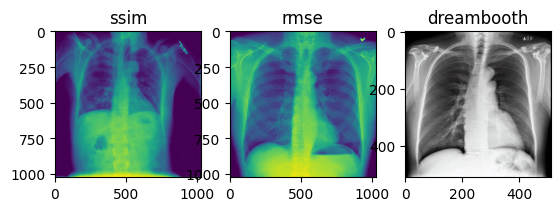

In [7]:
# show most similar image
fig, axs = plt.subplots(1, 3)
axs[0].imshow(plt.imread(min_ssim_img))
axs[0].set_title('ssim')
axs[1].imshow(plt.imread(min_rmse_img))
axs[1].set_title('rmse')
axs[2].imshow(image)
axs[2].set_title('dreambooth')
plt.show()


Evaluation for unconditional image

In [8]:
from diffusers import DiffusionPipeline
import  matplotlib.pyplot as plt
path_to_pretrained ='/home/siyuan/research/image_to_img_generation/uncond_img_gen/output'
generator = DiffusionPipeline.from_pretrained(path_to_pretrained)
generator.to("cuda")
generator = generator()
image = generator.images[0]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [9]:
# compare similarity
ssim_list = []
rmse_list = []
for img_path in all_imgs:
    gt_img = cv2.resize(cv2.imread(str(img_path)),image.size)
    pred_img = np.array(image)
    metric = evaluation(gt_img, pred_img, ['ssim', 'rmse'])
    ssim_list.append(metric['ssim'])
    rmse_list.append(metric['rmse'])
min_ssim_img = all_imgs[ssim_list.index(min(ssim_list))]
min_rmse_img = all_imgs[rmse_list.index(min(rmse_list))]

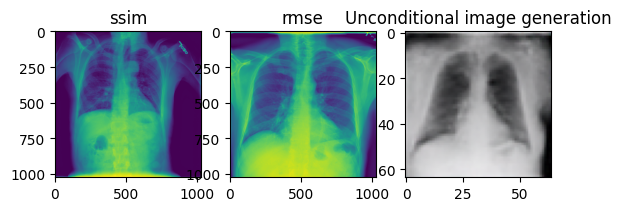

In [10]:
# show most similar image
fig, axs = plt.subplots(1, 3)
axs[0].imshow(plt.imread(min_ssim_img))
axs[0].set_title('ssim')
axs[1].imshow(plt.imread(min_rmse_img))
axs[1].set_title('rmse')
axs[2].imshow(image)
axs[2].set_title('Unconditional image generation')
plt.show()